In [ ]:
!wget https://www.lptmc.jussieu.fr/files/Sator/SP500_1950_2023.txt

--2023-02-24 22:10:18--  https://www.lptmc.jussieu.fr/files/Sator/SP500_1950_2023.txt
Resolving www.lptmc.jussieu.fr (www.lptmc.jussieu.fr)... 134.157.8.33
Connecting to www.lptmc.jussieu.fr (www.lptmc.jussieu.fr)|134.157.8.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1277702 (1.2M) [text/plain]
Saving to: ‘SP500_1950_2023.txt’

SP500_1950_2023.txt 100%[===================>]   1.22M  2.21MB/s    in 0.6s    

2023-02-24 22:10:19 (2.21 MB/s) - ‘SP500_1950_2023.txt’ saved [1277702/1277702]



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_table('SP500_1950_2023.txt')
display(data)

,#,Open,High,Low,Close,Volume,Date
0,1,16.66,16.66,16.66,16.66,1260000,1950-01-03
1,2,16.85,16.85,16.85,16.85,1890000,1950-01-04
2,3,16.93,16.93,16.93,16.93,2550000,1950-01-05
3,4,16.98,16.98,16.98,16.98,2010000,1950-01-06
4,5,17.08,17.08,17.08,17.08,2520000,1950-01-09
...,...,...,...,...,...,...,...
18390,18391,4158.68,4195.44,4141.88,4179.76,5624360000,"Feb 02, 2023"
18391,18392,4136.69,4182.36,4123.36,4136.48,4694510000,"Feb 03, 2023"
18392,18393,4119.57,4124.63,4093.38,4111.08,4114240000,"Feb 06, 2023"
18393,18394,4105.35,4176.54,4088.39,4164.00,4355860000,"Feb 07, 2023"


# 1. S&P500 index time series

0          16.66
1          16.85
2          16.93
3          16.98
4          17.08
          ...   
18390    4179.76
18391    4136.48
18392    4111.08
18393    4164.00
18394    4117.86
Name: Close, Length: 18395, dtype: float64


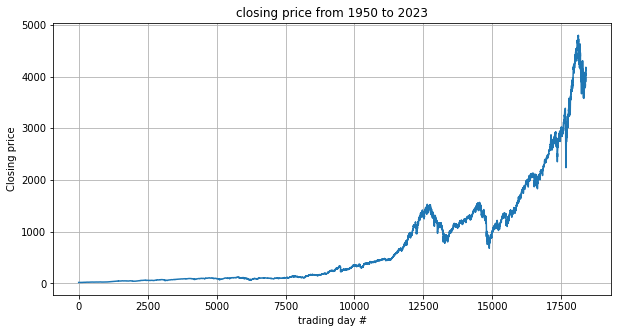

In [ ]:
#plot of price vs trading day
plt.figure(figsize=(10,5))
print(data['Close'])
plt.plot(data['Close'])
plt.title('closing price from 1950 to 2023')
plt.xlabel('trading day #')
plt.ylabel('Closing price')
plt.grid()

In [ ]:
#mean and standard deviation of the log return
close = data['Close'].to_numpy()
print(close)
lr = np.log(close[1:]/close[:-1])#log_return
mean = lr.mean()
var = lr.var()
sigma = np.sqrt(var)
print(mean)
print(var)
print(sigma)


[  16.66   16.85   16.93 ... 4111.08 4164.   4117.86]
0.00029955845673508574
9.977347223382746e-05
0.00998866719006232


18395


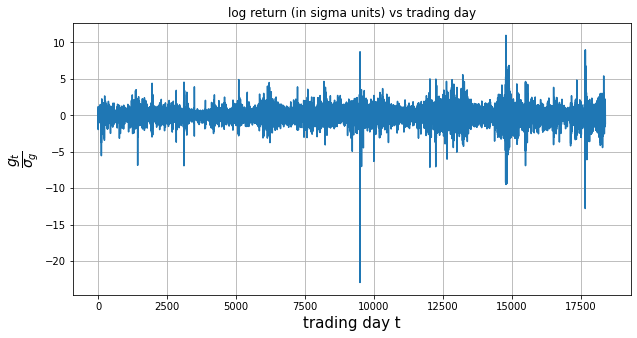

In [ ]:
#plot of the log return (in sigma units) vs trading day
print(len(close))
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(lr)),lr/sigma)
plt.title('log return (in sigma units) vs trading day')
plt.ylabel(r'$\frac{g_t}{\sigma_g}$',fontsize=20)
plt.xlabel('trading day t',fontsize=15)
plt.grid()

(-5.0, 5.0)

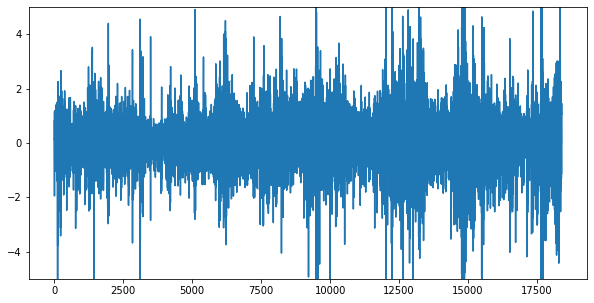

In [ ]:
#metto y lim per confrontare meglio
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(lr)),lr/sigma)
plt.ylim((-5,5))

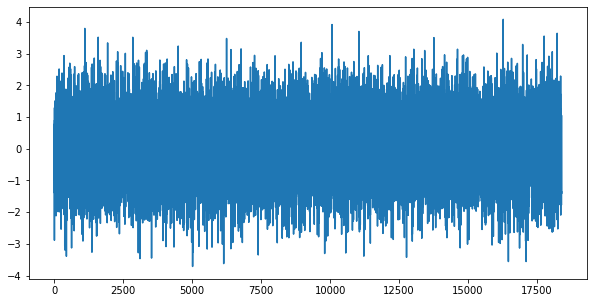

In [ ]:
#comparing with a gaussian random walk
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(lr)),np.random.normal(mean/sigma, 1, size=len(lr)))

(-5.0, 5.0)

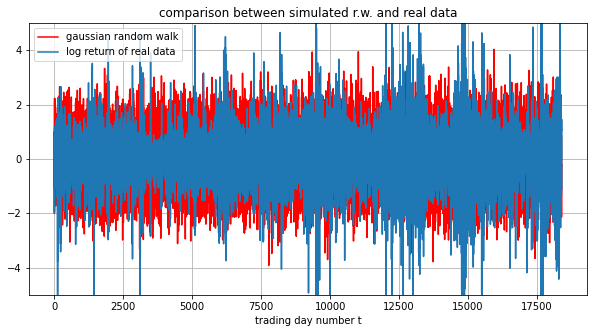

In [ ]:
#plot the two graphs together
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(lr)),np.random.normal(mean/sigma, 1, size=len(lr)), label='gaussian random walk',color='red')
plt.plot(np.arange(len(lr)),lr/sigma, label='log return of real data')
plt.legend()
plt.grid()
plt.title('comparison between simulated r.w. and real data')
plt.xlabel('trading day number t')
plt.ylim((-5,5))

(array([0.00144353, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

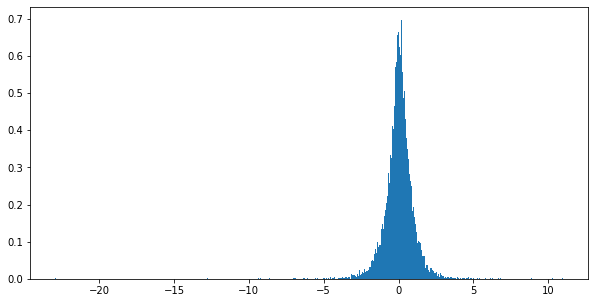

In [ ]:
#plot the pdf of the log return in sigma units
plt.figure(figsize=(10, 5))
plt.hist(lr/sigma, bins=900, density=True)
#plt.xlim((np.min(lr/sigma),np.max(lr/sigma)))

(array([0.00336917, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00336917,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00336917, 0.        ,
        0.        , 0.00336917, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00336917, 0.        ,
        0.00336917, 0.        , 0.00336917, 0.00336917, 0.        ,
        0.        , 0.        , 0.00336917, 0.        , 0.00336917,
        0.        , 0.        , 0.00673834, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01

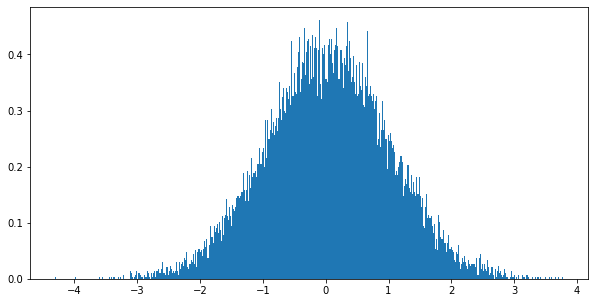

In [ ]:
#plot a normal distrib. with the same mean and sigma of the log return
plt.figure(figsize=(10, 5))
gauss = np.random.normal(mean, sigma, size=len(lr))
plt.hist(gauss/sigma, bins=500, density=True)

(-10.0, 10.0)

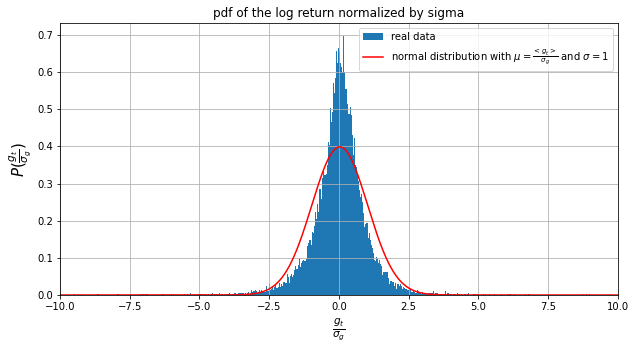

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(10, 5))
plt.hist(lr/sigma, bins=900, density=True, label='real data')
x = np.linspace(min(lr/sigma),max(lr/sigma),len(lr))
plt.plot(x, stats.norm.pdf(x, mean/sigma, 1), color='red', label=r'normal distribution with $\mu=\frac{<g_t>}{\sigma_g}$ and $\sigma=1$')
plt.xlabel(r'$\frac{g_t}{\sigma_g}$',fontsize=15)
plt.ylabel(r'$P(\frac{g_t}{\sigma_g})$',fontsize=15)
plt.title('pdf of the log return normalized by sigma')
plt.legend()
plt.grid()
plt.xlim(-10,10)


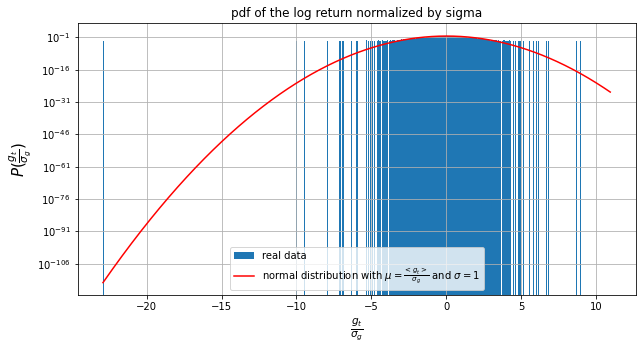

In [ ]:
plt.figure(figsize=(10, 5))
#plt.yscale('log')
plt.hist(lr/sigma, bins=900, density=True, label='real data', log=True)
x = np.linspace(min(lr/sigma),max(lr/sigma),len(lr))
plt.plot(x, stats.norm.pdf(x, mean/sigma, 1), color='red', label=r'normal distribution with $\mu=\frac{<g_t>}{\sigma_g}$ and $\sigma=1$')
plt.xlabel(r'$\frac{g_t}{\sigma_g}$',fontsize=15)
plt.ylabel(r'$P(\frac{g_t}{\sigma_g})$',fontsize=15)
plt.title('pdf of the log return normalized by sigma')
plt.legend()
plt.grid()
#plt.xlim(-10,10)

(-10.0, 10.0)

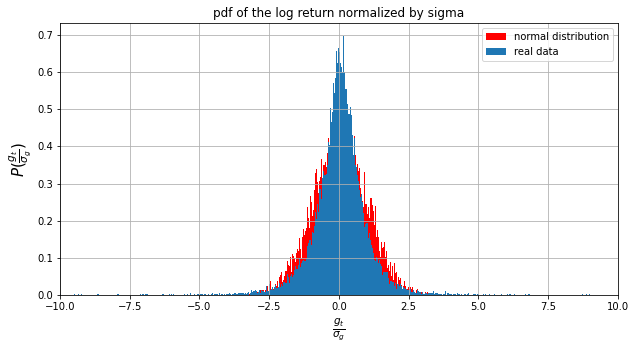

In [ ]:
#compare the 2 distributions
plt.figure(figsize=(10, 5))
gauss = np.random.normal(mean, sigma, size=len(lr))
plt.hist(gauss/sigma, bins=500, density=True,color='red', label='normal distribution')
plt.hist(lr/sigma, bins=900, density=True, label='real data')
plt.xlabel(r'$\frac{g_t}{\sigma_g}$',fontsize=15)
plt.ylabel(r'$P(\frac{g_t}{\sigma_g})$',fontsize=15)
plt.title('pdf of the log return normalized by sigma')
plt.legend()
plt.grid()
plt.xlim(-10,10)


(-10.0, 10.0)

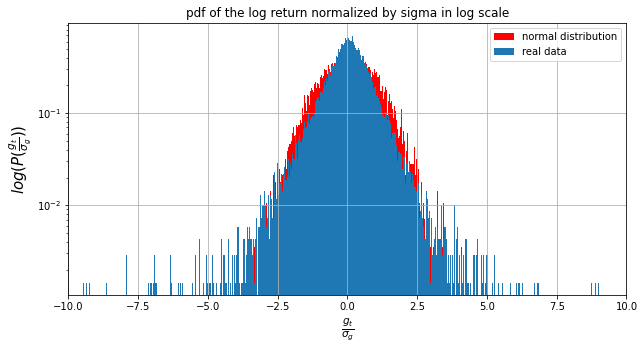

In [ ]:
#compare the 2 distributions in log scale
plt.figure(figsize=(10, 5))
gauss = np.random.normal(mean, sigma, size=len(lr))
plt.hist(gauss/sigma, bins=500, density=True,color='red',log=True, label='normal distribution')
plt.hist(lr/sigma, bins=900, density=True,log=True, label='real data')
plt.grid()
plt.legend()
plt.title('pdf of the log return normalized by sigma in log scale')
plt.xlabel(r'$\frac{g_t}{\sigma_g}$',fontsize=15)
plt.ylabel(r'$log(P(\frac{g_t}{\sigma_g}))$',fontsize=15)
plt.xlim((-10,10))

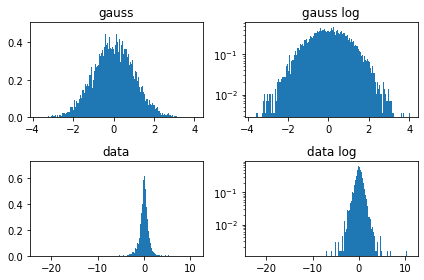

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(gauss/sigma, bins=500, density=True)
axs[0, 0].set_title('gauss')
axs[0, 1].hist(gauss/sigma, bins=500, density=True,log=True)
axs[0, 1].set_title('gauss log')
axs[1, 0].hist(lr/sigma, bins=900, density=True)
axs[1, 0].set_title('data')
#axs[1, 0].xlim((-500,500))
axs[1, 1].hist(lr/sigma, bins=900, density=True,log=True)
axs[1, 1].set_title('data log')
#axs[1, 1].xlim((-500,500))
fig.tight_layout()
plt.show()

In [ ]:
#EXCESS KURTOSIS
import scipy.stats as stats
from scipy.stats import kurtosis
excess_kurtosis = kurtosis(lr) - 3
print(excess_kurtosis)
#the data are more concentrate near the mean than a gaussian

22.581679446720756


##Monthly changes

In [ ]:
#define new mean and std dev of the monthly log return
close1 = close[::22] #take a closing price per month (i.e. every 22 trading days)
#print(close1)
lr1 = np.log(close1[1:]/close1[:-1]) #log_return
print(len(lr1))
print(len(lr)/len(lr1))
mean1 = lr1.mean()
var1 = lr1.var()
sigma1=np.sqrt(var1)
print(mean1)
print(sigma1)

836
22.002392344497608
0.006589031590855557
0.0459213829188406


Text(0, 0.5, '$\\frac{g_t\\prime}{\\sigma_{g\\prime}}$')

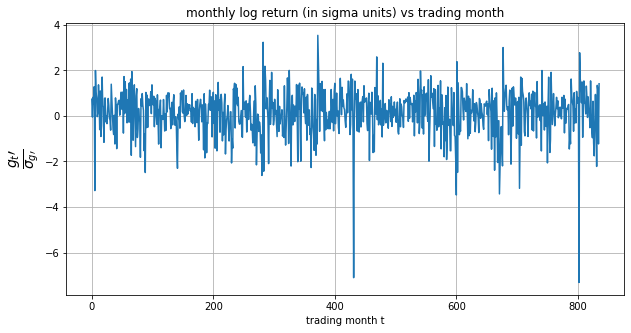

In [ ]:
#plot of the monthly log return
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(lr1)),lr1/sigma1)
plt.grid()
plt.title('monthly log return (in sigma units) vs trading month')
plt.xlabel('trading month t')
plt.ylabel(r'$\frac{g_t\prime}{\sigma_{g\prime}}$', fontsize=20)

Text(0.5, 1.0, 'comparison between simulated r.w. and real data')

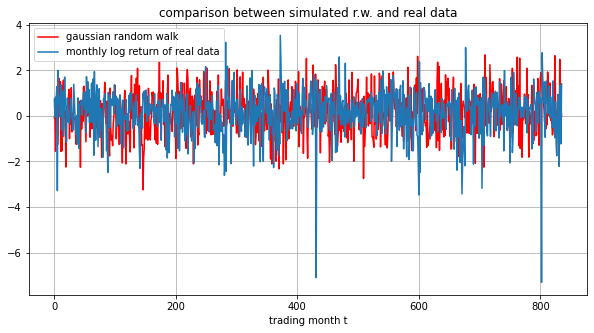

In [ ]:
#comparing the monthly log return with a gaussian random walk
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(lr1)),np.random.normal(mean1/sigma1, 1, size=len(lr1)),color='red',label='gaussian random walk')
plt.plot(np.arange(len(lr1)),lr1/sigma1, label='monthly log return of real data')
plt.grid()
plt.xlabel('trading month t')
plt.legend()
plt.title('comparison between simulated r.w. and real data')


Text(0.5, 0, 'trading month t')

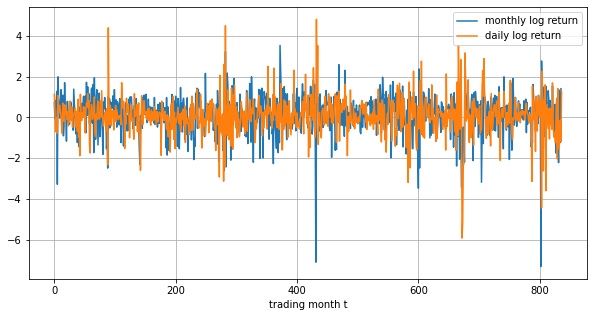

In [ ]:
#comparing the monthly log return with the daily log return
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(lr1)),lr1/sigma1,label='monthly log return')
lr_monthly = lr[::22]
plt.plot(np.arange(len(lr_monthly)),lr_monthly/sigma,label='daily log return')
plt.legend()
plt.grid()
plt.xlabel('trading month t')

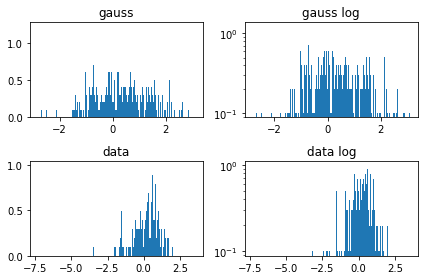

In [ ]:
gauss1 = np.random.normal(mean1, sigma1, size=len(lr1))
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(gauss1/sigma1, bins=500, density=True)
axs[0, 0].set_title('gauss')
axs[0, 1].hist(gauss1/sigma1, bins=500, density=True,log=True)
axs[0, 1].set_title('gauss log')
axs[1, 0].hist(lr1/sigma1, bins=900, density=True)
axs[1, 0].set_title('data')

axs[1, 1].hist(lr1/sigma1, bins=900, density=True,log=True)
axs[1, 1].set_title('data log')

fig.tight_layout()
plt.show()

(array([0.00367091, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00367091, 0.        , 0.00367091, 0.        ,
        0.        , 0.        , 0.00367091, 0.        , 0.        ,
        0.        , 0.        , 0.00367091, 0.        , 0.        ,
        0.        , 0.00734182, 0.        , 0.00367091, 0.00367091,
        0.00367091, 0.01101273, 0.        , 0.00367091, 0.00367091,
        0.        , 0.00734182, 0.01468365, 0.01101273, 0.        ,
        0.        , 0.        , 0.00367091, 0.00367091, 0.        ,
        0.00367091, 0.01835456, 0.01835456, 0.00367091, 0.        ,
        0.        , 0.00734182, 0.01101273, 0.01101273, 0.00734182,
        0.01101273, 0.        , 0.01835456, 0.01468365, 0.01101273,
        0.00734182, 0.00734182, 0.00734182, 0.        , 0.01101273,
        0.01101273, 0.01468365, 0.00734182, 0.01835456, 0.01835456,
        0.02202547, 0.00734182, 0.01101273, 0.01

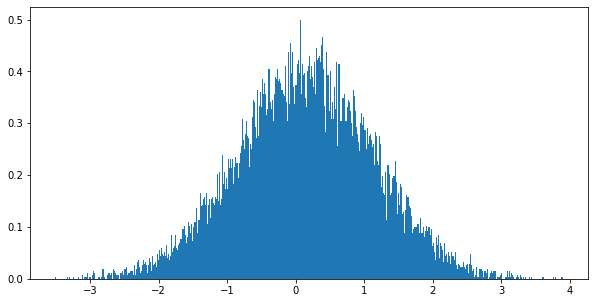

In [ ]:
#plot a normal distrib. with the same mean and sigma of the log return
plt.figure(figsize=(10, 5))
gauss1 = np.random.normal(mean1, sigma1, size=len(lr))
plt.hist(gauss1/sigma1, bins=500, density=True)

(-10.0, 10.0)

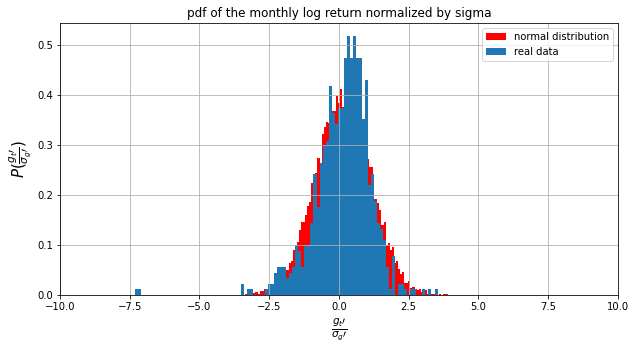

In [ ]:
#compare the 2 distributions
plt.figure(figsize=(10, 5))
#gauss = np.random.normal(mean, sigma, size=len(lr))
plt.hist(gauss1/sigma1, bins=100, density=True,color='red', label='normal distribution')
plt.hist(lr1/sigma1, bins=100, density=True, label='real data')
plt.xlabel(r'$\frac{g_t\prime}{\sigma_g\prime}$',fontsize=15)
plt.ylabel(r'$P(\frac{g_t\prime}{\sigma_g\prime})$',fontsize=15)
plt.title('pdf of the monthly log return normalized by sigma')
plt.legend()
plt.grid()
plt.xlim((-10,10))

(-10.0, 10.0)

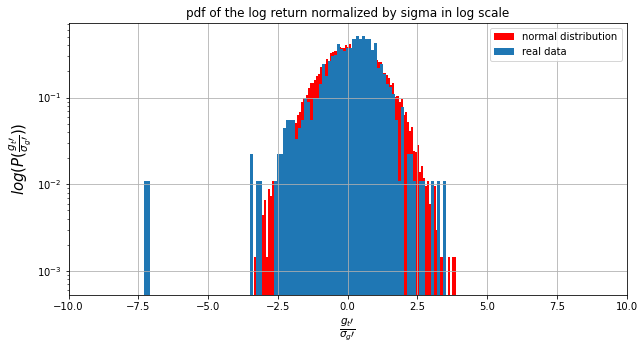

In [ ]:
#compare the 2 distrib. in logscale
plt.figure(figsize=(10, 5))
plt.hist(gauss1/sigma1, bins=100, density=True,color='red',log=True, label='normal distribution')
plt.hist(lr1/sigma1, bins=100, density=True,log=True, label='real data')
plt.grid()
plt.legend()
plt.title('pdf of the log return normalized by sigma in log scale')
plt.xlabel(r'$\frac{g_t\prime}{\sigma_g\prime}$',fontsize=15)
plt.ylabel(r'$log(P(\frac{g_t\prime}{\sigma_g\prime}))$',fontsize=15)
plt.xlim((-10,10))

In [ ]:
excess_kurtosis1 = kurtosis(lr1) - 3
print(excess_kurtosis1)

4.030366600559139


In [ ]:
#guardo a intervalli di tempo piu grandi, dove le fluttuazionisono piu piccole...

#Time correlations

##Autocorrelation of the S&P500 index

In [ ]:
#define the correlation function
signs = np.sign(lr)
ampl = np.abs(lr)
def corr(x,k):
  if k==0:
    if x==0:
      return 1 #corr al tempo zero
    return ((lr[:-x]*lr[x:]).mean()-((lr[:-x]).mean())*((lr[x:]).mean()))/((lr*lr).mean()-((lr).mean())*((lr).mean()))
  if k==1:
    if x==0:
      return 1 #corr al tempo zero
    return ((signs[:-x]*signs[x:]).mean()-((signs[:-x]).mean())*((signs[x:]).mean()))/((signs*signs).mean()-((signs).mean())*((signs).mean()))
  if k==2:
    if x==0:
      return 1 #corr al tempo zero
    return ((ampl[:-x]*ampl[x:]).mean()-((ampl[:-x]).mean())*((ampl[x:]).mean()))/((ampl*ampl).mean()-((ampl).mean())*((ampl).mean()))
  if k==3:
    if x==0:
      return 1 #corr al tempo zero
    g1=lr[:-x]*lr[:-x]
    g2=lr[x:]*lr[x:]
    return ((g1*g2).mean()-((g2).mean())*((g1).mean()))/((lr*lr*lr*lr).mean()-((lr*lr).mean())*((lr*lr).mean()))

200
[1, -0.0005175931697827239, -0.020479289904924407, -0.0012576404404636748, -0.013991570274015546, -0.002121198095027294, -0.02433193274323259, 0.009592294747071378, -0.013483571177086505, 0.017130030971191618, -0.00017187481004217887, -0.00886616881033534, 0.026331452485036797, -0.010101591817729853, 0.00816017251674015, -0.02525402869915862, 0.03949993834776222, -0.007219907697633937, -0.015620281585467397, -0.0007105882530351108, 0.004673677123756298, -0.00993964475456574, -0.016523756995918102, 0.00023905537622374547, 0.005209308159313597, -0.011258565427156529, -0.02362906356142003, 0.021067014631369396, 0.001522082100474158, 0.016611811215924498, 0.006874936587144823, -0.015848095495128087, 0.012436885127570388, 0.012344087464030287, -0.030501332277661317, 0.002030508396709287, 0.010584494211974492, -0.007948228926153395, -0.005389086527493832, 0.009426197254850015, -0.006811466474881587, 0.0017135048662440784, 0.0013057265594867437, -0.014703302885794531, -0.00054425065718264

Text(0, 0.5, "C(t-t')")

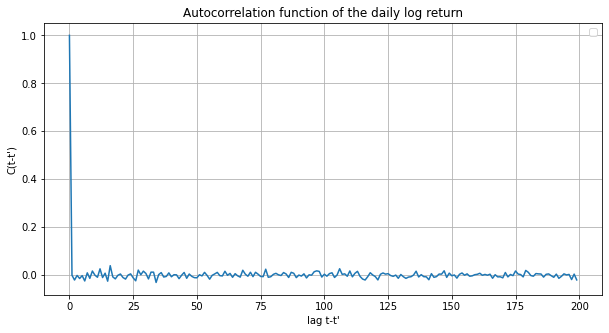

In [ ]:
correl=[corr(i,0) for i in range(0,200)]
print(len(correl))
print(correl)
plt.figure(figsize=(10, 5))
plt.plot(correl)
#bassa correlazione per ogni t
plt.legend()
plt.grid()
plt.title('Autocorrelation function of the daily log return')
plt.xlabel('lag t-t\'')
plt.ylabel('C(t-t\')')

[1, 0.05463721924295204, -0.022285761839754798, -0.011563291282284617, 0.013019708398412265, 0.0063651022384503785, -0.0018229533187572075, -0.0022083521276138824, 0.007080515767594209, -0.0003936745805409628, 0.004454765929241565, -0.0006693011345151516, 0.01374602809195322, 0.012653397550062145, 0.00578276894083578, -0.007321739322330491, 0.013142668749955974, -0.005356441541750743, 0.0034566813874013585, 0.005335422947409355, 0.0020401018165372596, -0.008415546220854829, -0.008526340302076673, 0.0007294256576253802, 0.01146541691258103, -0.00015195018629968527, -0.007042469249415855, 0.00485124465962579, 0.006117839530008573, 0.00974534091090899, 0.005060549888304422, 0.004124232837727081, -0.00463370275537067, 0.011953542031165864, 0.004517144722686104, 0.006996223853757277, 0.005288487090753784, 0.005450147305520696, 0.006820308598046914, 0.01597479143422873, 0.011401649601711542, 0.023085013160949647, 0.004741321908069137, 0.0018129043775333366, 0.003569134230170285, 0.0086327689

'from scipy.optimize import curve_fit\n\ndef power_law(x, p1, p2):\n    return p1 * np.power(x, -p2)\nx=np.arange(len(corr_ampl))\nparams, params_covariance = curve_fit(power_law, x, corr_ampl)\nprint("Optimal params:", params)\nplt.figure(figsize=(10, 5))\nplt.plot(power_law(x,params[0] , params[1]),label=\'Fit\')\nplt.plot(corr_ampl, label=\'Ampl\')'

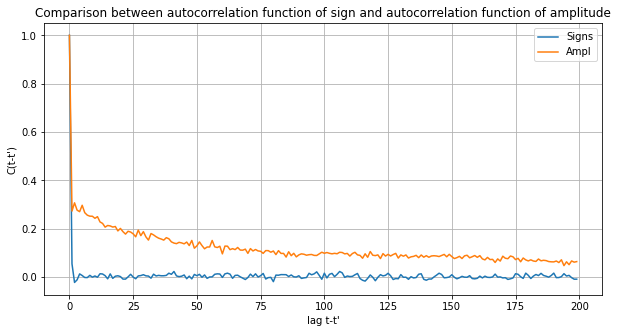

In [ ]:
corr_signs=[corr(i,1) for i in range(0,200)]
corr_ampl=[corr(i,2) for i in range(0,200)]
print(corr_signs)
print(corr_ampl)
plt.figure(figsize=(10, 5))
plt.plot(corr_signs, label='Signs')
plt.plot(corr_ampl, label='Ampl')
plt.legend()
plt.grid()
plt.title('Comparison between autocorrelation function of sign and autocorrelation function of amplitude')
plt.xlabel('lag t-t\'')
plt.ylabel('C(t-t\')')
'''from scipy.optimize import curve_fit

def power_law(x, p1, p2):
    return p1 * np.power(x, -p2)
x=np.arange(len(corr_ampl))
params, params_covariance = curve_fit(power_law, x, corr_ampl)
print("Optimal params:", params)
plt.figure(figsize=(10, 5))
plt.plot(power_law(x,params[0] , params[1]),label='Fit')
plt.plot(corr_ampl, label='Ampl')'''


Optimal params: [1.]


<ipython-input-31-f94e4fa7d8aa>:4: RuntimeWarning: divide by zero encountered in power
  return p1 * np.power(x, -0.5)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0, 0.5, "C(t-t')")

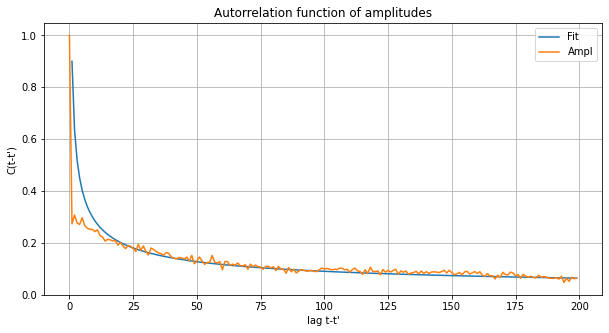

In [ ]:
from scipy.optimize import curve_fit

def power_law(x, p1):
    return p1 * np.power(x, -0.5)
x=np.arange(len(corr_ampl))
params, params_covariance = curve_fit(power_law, x, corr_ampl)
print("Optimal params:", params)
plt.figure(figsize=(10, 5))
plt.plot(power_law(x, 0.9),label='Fit')
plt.plot(corr_ampl, label='Ampl')
plt.legend()
plt.grid()
plt.title('Autorrelation function of amplitudes')
plt.xlabel('lag t-t\'')
plt.ylabel('C(t-t\')')

Optimal params: [1.]


<ipython-input-32-e7c2b8e1efa4>:4: RuntimeWarning: divide by zero encountered in power
  return p1 * np.power(x, -0.85)


Text(0, 0.5, "C(t-t')")

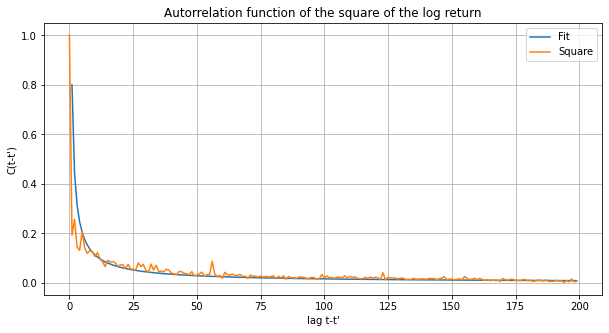

In [ ]:
from scipy.optimize import curve_fit

def power_law(x, p1):
    return p1 * np.power(x, -0.85)
square=[corr(i,3) for i in range(0,200)]
x=np.arange(len(square))
params, params_covariance = curve_fit(power_law, x, square)
print("Optimal params:", params)
plt.figure(figsize=(10, 5))
plt.plot(power_law(x,0.8),label='Fit')
plt.plot(square, label='Square')
plt.legend()
plt.grid()
plt.title('Autorrelation function of the square of the log return')
plt.xlabel('lag t-t\'')
plt.ylabel('C(t-t\')')

[-90.42472175178149, 31.324431227888432, 21.48381506036904, -9.841750222613188, -3.999630181004691, -24.351925291648495, 8.632790856798964, -1.3084665633992825, 19.376612229927666, 19.978985160247856, 2.310851992974857, 3.3000136251910988, -4.661457236699371, 16.651118308815168, -3.888851874149249, 7.019908296012763, -0.9733394539793749, -1.6476495623030345, 18.80387933357516, -7.754790364994605, 10.477013375072058, 4.84538165118716, 4.289618555113017, 2.256720815774286, 1.7912637644678058, 2.544377378615157, 2.538056603697049, -5.62799227663367, 2.206817000502509, -2.136219734463185, 8.187078091039982, 9.968372710667335, -8.000447171177273, 6.783709430151734, 10.169712339223185, 7.948564949453802, 10.87713476163154, -7.0698877735746635, 8.148283790109375, 18.223559116858535, 5.042609434458807, 11.893553523622028, -0.4497302477363526, 16.161018379166336, -0.21009605997281633, 11.630712287481865, 7.114887443249121, -0.17490165472702243, -3.6048537660856783, 7.507051795345473, 11.3060798

Text(0, 0.5, "L(t-t')")

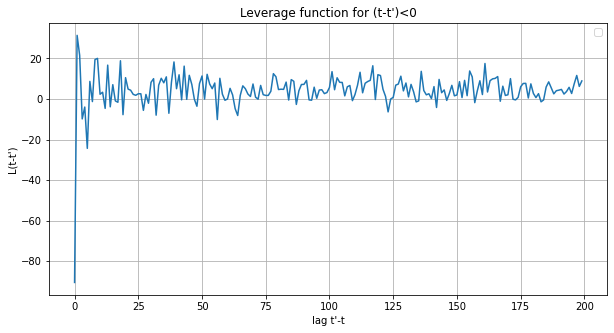

In [ ]:
def funz(x,y):
  if y==0:
    if x==0:
      return (lr*lr*lr).mean()/((lr*lr).mean()*(lr*lr).mean())
    g1=lr[:-x]*lr[:-x]
    return (g1*lr[x:]).mean()/((g1).mean()*(g1).mean())
  if y==1:
    if x==0:
      return (lr*lr*lr).mean()/((lr*lr).mean()*(lr*lr).mean())
    g2=lr[x:]*lr[x:]
    return (g2*lr[:-x]).mean()/((g2).mean()*(g2).mean())
lev=[funz(i,0) for i in range(0,200)]
print(lev)
plt.figure(figsize=(10, 5))
plt.plot(lev)
plt.legend()
plt.grid()
plt.title('Leverage function for (t-t\')<0')
plt.xlabel('lag t\'-t')
plt.ylabel('L(t-t\')')

[-90.42472175178149, -41.72672883966885, -48.32017045714407, -30.325095986892254, -20.31013646667751, -32.68705506891764, -25.01022345233729, -13.959383515905923, -24.534628893778223, -21.870787047881308, -20.099645753983456, -8.942637700442909, -15.554013358322964, -16.38142478545452, -11.422280599881997, -17.40575105420172, -0.7047679433023292, -10.015816349611994, -6.063385324548978, 6.652904819603548, -19.05937779727357, -14.493999292970017, -5.245914323059866, -0.397365515134265, -12.3057271816703, -8.619688753949008, 1.9919985467884704, -1.1839829419407877, -0.1984103457117059, -11.574233137220059, -7.118981588435755, -6.406784019375612, -13.05177591919452, -11.449759559443946, -3.111454567382881, -7.68702308442432, -11.940146048563694, -6.212792995547266, -0.2194164017704658, -7.329978280135627, -5.320334608824173, -2.2584535181056498, -1.2567400994741356, -0.5100300092002111, -4.0972442376963105, 2.3172528729717157, 3.1088748233591614, -3.1175927182151475, 4.3494240759338485, -

Text(0, 0.5, "L(t'-t)")

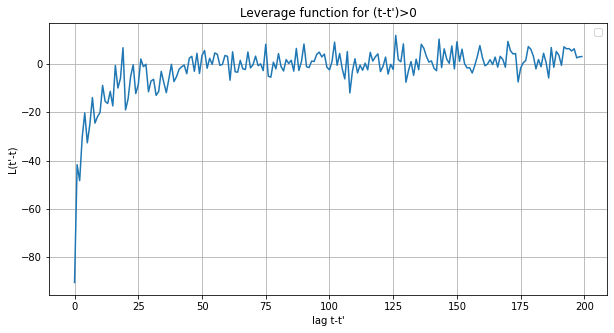

In [ ]:
lev1=[funz(i,1) for i in range(0,200)]
print(lev1)
plt.figure(figsize=(10, 5))
plt.plot(lev1)
plt.legend()
plt.grid()
plt.title('Leverage function for (t-t\')>0')
plt.xlabel('lag t-t\'')
plt.ylabel('L(t\'-t)')

Optimal params: [63.08740942  7.39096952]


Text(0, 0.5, "L(t'-t)")

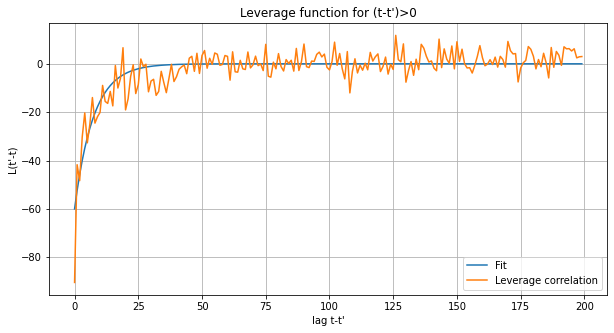

In [ ]:
def exp(x, A, B):
    return -A * np.exp(-x/B)
x=np.arange(len(lev1))
params, params_covariance = curve_fit(exp, x, lev1)
print("Optimal params:", params)
plt.figure(figsize=(10, 5))
plt.plot(exp(x,60, params[1]),label='Fit')
plt.plot(lev1, label='Leverage correlation')
plt.legend()
plt.grid()
plt.title('Leverage function for (t-t\')>0')
plt.xlabel('lag t-t\'')
plt.ylabel('L(t\'-t)')